In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [2]:
data = np.load("../my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

## Split train and test data

In [3]:
X = X.reshape(X.shape[0], -1)
# split train and test data(ratio 0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [4]:
# X_data 0 to 1 scaled
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

## Classification

### Random Forest

In [5]:
rnd_clf = RandomForestClassifier(verbose=2)
rnd_clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(verbose=2)

In [6]:
# accuracy score
y_pred_rnd = rnd_clf.predict(X_train_scaled)
accuracy_score_rnd_train = accuracy_score(y_pred_rnd, y_train)
print(accuracy_score_rnd_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [7]:
# confusion matrix value
matric_rnd_train = confusion_matrix(y_train, y_pred_rnd)
matric_rnd_train

array([[3317,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2697,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4289,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 3923,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 3271,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2602,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4261,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4009,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4681,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3331]],
      dtype=int64)

### Random Forest with Cross-validation

In [8]:
# Random Forest with cross validation
rnd_clf = RandomForestClassifier()
cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.95942937, 0.95992414, 0.96074874])

In [9]:
# accuracy score
y_pred_rnd_cv = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)
accuracy_score_rnd_train = accuracy_score(y_pred_rnd_cv, y_train)
print(accuracy_score_rnd_train)

0.9600340837250213


In [10]:
# confusion matrix value
matric_rnd_train_cv = confusion_matrix(y_train, y_pred_rnd_cv)
matric_rnd_train_cv

array([[3254,    1,    5,    3,    2,    5,   16,    2,   27,    2],
       [   1, 2640,   17,    6,    6,    3,    7,    5,    8,    4],
       [  19,    7, 4149,   17,   21,    3,   12,   26,   34,    1],
       [   7,    4,   68, 3708,    3,   26,   10,   29,   51,   17],
       [   7,    5,   10,    0, 3123,    2,   25,    8,   14,   77],
       [  14,    4,    5,   61,    4, 2424,   33,    5,   35,   17],
       [  18,    6,    3,    0,    4,   16, 4188,    0,   26,    0],
       [   3,   15,   44,    3,   22,    0,    1, 3853,   13,   55],
       [  11,   19,   35,   31,   18,   17,   28,    3, 4483,   36],
       [  12,    4,   14,   42,   58,   12,    4,   43,   37, 3105]],
      dtype=int64)

<AxesSubplot:>

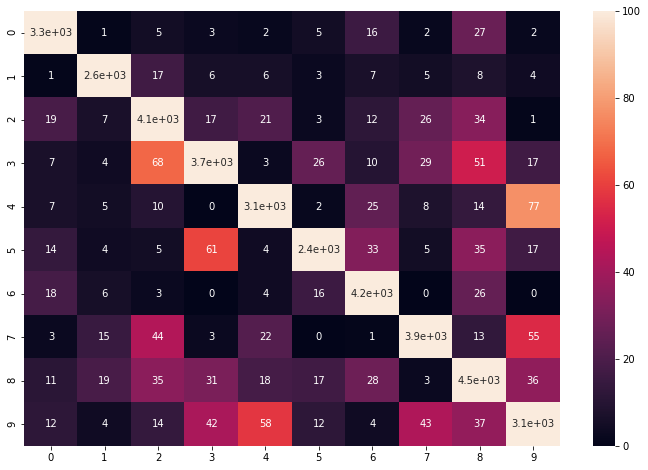

In [11]:
# confusion matrix plot
plt.figure(figsize=(12,8))
sns.heatmap(matric_rnd_train_cv, annot=True, vmin=0, vmax=100)

## Hyper parameter tuning with Random Forest

In [16]:
rnd_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# split train and valid data(ratio 0.8:0.2)
X_train_for_hp, X_valid, y_train_for_hp, y_valid = train_test_split(
    X_train_scaled, y_train, test_size=0.2, stratify=y_train)

### change max depth

In [20]:
# max depth parameter
max_depth = np.arange(1,100)

train_result_list = []
valid_result_list = []
for max_depth_param in max_depth:
    rnd_clf = RandomForestClassifier(max_depth=max_depth_param)
    rnd_clf.fit(X_train_for_hp, y_train_for_hp)
    y_pred_train = rnd_clf.predict(X_train_for_hp)
    accuracy_score_rnd_train = accuracy_score(y_pred_train, y_train_for_hp)
    
    train_result_list.append(accuracy_score_rnd_train)
    
    y_pred_valid = rnd_clf.predict(X_valid)
    accuracy_score_rnd_valid = accuracy_score(y_pred_valid, y_valid)
    
    valid_result_list.append(accuracy_score_rnd_valid)

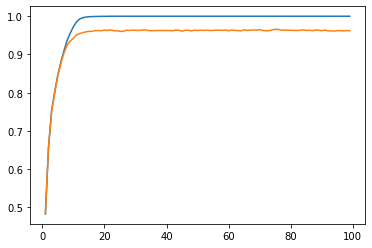

In [21]:
plt.figure()
plt.plot(max_depth, train_result_list)
plt.plot(max_depth, valid_result_list)

In [37]:
max_depth_train_valid_diff_min = np.argmax((np.array(train_result_list) - np.array(valid_result_list)) > 0.01)

In [38]:
max_depth_train_valid_diff_min

7

In [40]:
# n estimator parameter
n_estimators = np.arange(1,100)

train_result_list = []
valid_result_list = []
for n_estimator in n_estimators:
    rnd_clf = RandomForestClassifier(n_estimators=n_estimator, 
                                     max_depth=max_depth_train_valid_diff_min)
    rnd_clf.fit(X_train_for_hp, y_train_for_hp)
    y_pred_train = rnd_clf.predict(X_train_for_hp)
    accuracy_score_rnd_train = accuracy_score(y_pred_train, y_train_for_hp)
    
    train_result_list.append(accuracy_score_rnd_train)
    y_pred_valid = rnd_clf.predict(X_valid)
    accuracy_score_rnd_valid = accuracy_score(y_pred_valid, y_valid)
    
    valid_result_list.append(accuracy_score_rnd_valid)

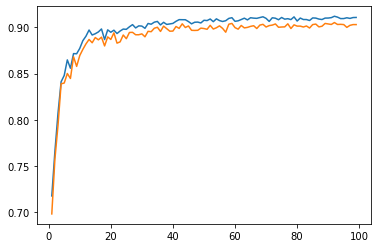

In [41]:
plt.figure()
plt.plot(n_estimators, train_result_list)
plt.plot(n_estimators, valid_result_list)

In [42]:
n_estimators_min = np.argmax(np.array(valid_result_list) > 0.9)

In [43]:
n_estimators_min

34